In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

In [2]:
raw_df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
y = raw_df['price']
X = raw_df.drop(labels=['price'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

In [5]:
eda_df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).drop('id', axis=1).reset_index(drop=True)

In [6]:
eda_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727700e+04,17277.000000,17277.000000,17277.000000,1.727700e+04,17277.000000,15356.000000,17232.000000,17277.000000,17277.000000,17277.000000,17277.000000,14195.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,5.403367e+05,3.374660,2.111333,2077.266192,1.503784e+04,1.491405,0.008075,0.237291,3.411646,7.654570,1784.938357,1970.874747,83.956252,98078.032818,47.559810,-122.214703,1987.588181,12637.828500
std,3.686163e+05,0.931114,0.766177,915.753595,4.099151e+04,0.540391,0.089500,0.771072,0.650234,1.167855,826.015132,29.354222,400.711193,53.478216,0.138647,0.140092,685.403769,25955.985544
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.500000,1425.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470900,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.571400,-122.231000,1840.000000,7620.000000
75%,6.412500e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.126000,2360.000000,10101.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


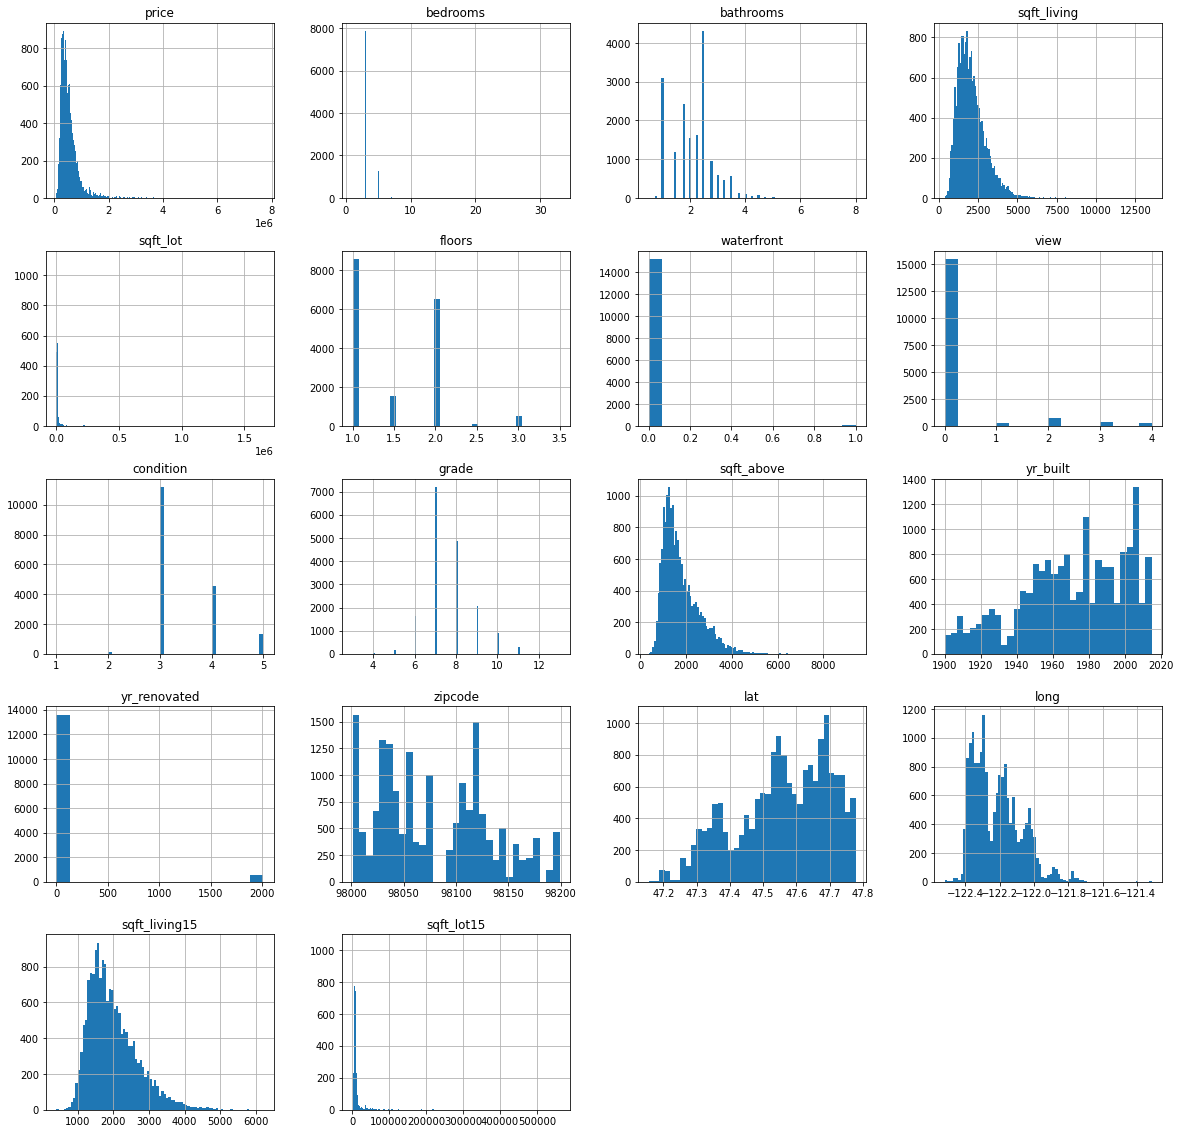

In [7]:
eda_df.hist(figsize=(20, 20), bins='auto');

# Data Cleaning

In [8]:
eda_df.isnull().sum()

price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1921
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3082
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
eda_df

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,7/31/2014,3,1.75,1660,10440,1.0,0.0,0.0,3,7,1040,620.0,1978,0.0,98045,47.4448,-121.770,1240,10380
17273,525000.0,3/13/2015,3,2.50,2200,4544,2.0,0.0,0.0,3,8,2200,0.0,2000,0.0,98065,47.5319,-121.867,2400,5431
17274,290000.0,7/24/2014,2,1.50,770,850,2.0,0.0,0.0,3,7,770,0.0,2006,0.0,98116,47.5644,-122.388,1350,915
17275,465000.0,3/27/2015,5,1.75,2000,10246,1.0,0.0,2.0,3,7,1200,800.0,1953,0.0,98178,47.5084,-122.246,2340,9030


In [10]:
new_df = eda_df

In [11]:
new_df.drop('yr_renovated', axis=1, inplace=True)

In [12]:
new_df.drop('date', axis=1, inplace=True)

In [13]:
new_df.drop('sqft_basement', axis=1, inplace = True)

In [14]:
new_df['waterfront'].fillna(0, inplace=True)

In [15]:
new_df.drop('view', axis=1, inplace=True)

In [16]:
new_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4,2.50,2620,9359,2.0,0.0,3,9,2620,1987,98058,47.4380,-122.152,2580,7433
1,631750.0,3,1.75,2360,4063,1.0,0.0,5,7,1180,1940,98117,47.6902,-122.382,1660,4063
2,452500.0,3,2.50,2240,7791,2.0,0.0,3,7,2240,2002,98065,47.5361,-121.880,2480,5018
3,4670000.0,5,6.75,9640,13068,1.0,1.0,3,12,4820,1983,98040,47.5570,-122.210,3270,10454
4,709000.0,3,2.75,2780,7200,1.5,0.0,4,8,1870,1913,98118,47.5632,-122.270,1700,7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,3,1.75,1660,10440,1.0,0.0,3,7,1040,1978,98045,47.4448,-121.770,1240,10380
17273,525000.0,3,2.50,2200,4544,2.0,0.0,3,8,2200,2000,98065,47.5319,-121.867,2400,5431
17274,290000.0,2,1.50,770,850,2.0,0.0,3,7,770,2006,98116,47.5644,-122.388,1350,915
17275,465000.0,5,1.75,2000,10246,1.0,0.0,3,7,1200,1953,98178,47.5084,-122.246,2340,9030


In [18]:
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']

In [19]:
new2_df = new_df[columns]

In [20]:
new2_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,405000.0,4,2.50,2620,9359,2.0,9,2620,1987,2580,7433
1,631750.0,3,1.75,2360,4063,1.0,7,1180,1940,1660,4063
2,452500.0,3,2.50,2240,7791,2.0,7,2240,2002,2480,5018
3,4670000.0,5,6.75,9640,13068,1.0,12,4820,1983,3270,10454
4,709000.0,3,2.75,2780,7200,1.5,8,1870,1913,1700,7200
...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,3,1.75,1660,10440,1.0,7,1040,1978,1240,10380
17273,525000.0,3,2.50,2200,4544,2.0,8,2200,2000,2400,5431
17274,290000.0,2,1.50,770,850,2.0,7,770,2006,1350,915
17275,465000.0,5,1.75,2000,10246,1.0,7,1200,1953,2340,9030


In [21]:
new_df = new2_df

In [22]:
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,405000.0,4,2.50,2620,9359,2.0,9,2620,1987,2580,7433
1,631750.0,3,1.75,2360,4063,1.0,7,1180,1940,1660,4063
2,452500.0,3,2.50,2240,7791,2.0,7,2240,2002,2480,5018
3,4670000.0,5,6.75,9640,13068,1.0,12,4820,1983,3270,10454
4,709000.0,3,2.75,2780,7200,1.5,8,1870,1913,1700,7200
...,...,...,...,...,...,...,...,...,...,...,...
17272,288000.0,3,1.75,1660,10440,1.0,7,1040,1978,1240,10380
17273,525000.0,3,2.50,2200,4544,2.0,8,2200,2000,2400,5431
17274,290000.0,2,1.50,770,850,2.0,7,770,2006,1350,915
17275,465000.0,5,1.75,2000,10246,1.0,7,1200,1953,2340,9030


<AxesSubplot:>

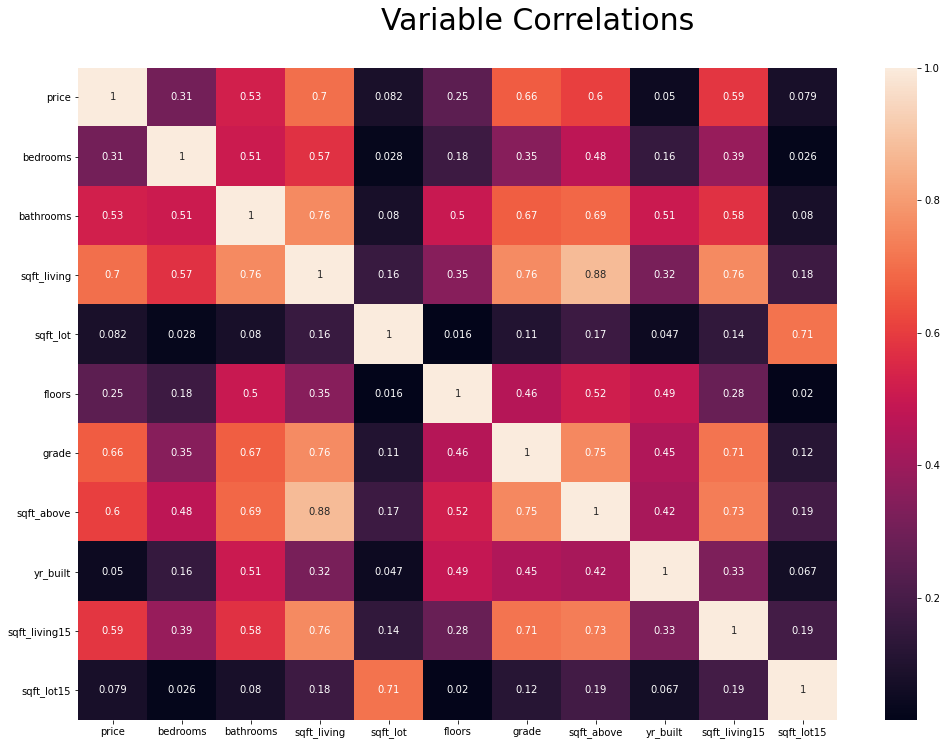

In [23]:
corr = new_df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

# Correlations

In [24]:
feat = []
corrs = []
for xy, correlation in corr['price'].T.iteritems():
    if correlation >= .49 and xy != 'price':
        feat.append(xy)
        corrs.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':corrs, 'Features': feat}).sort_values(by=['Correlations'], ascending=False)

In [25]:
multicoll_feat = []
multicoll_corr = []
def multi_corr(f):
    for xy, correlation in corr[f].T.iteritems():
        if correlation >= .80 and xy != f:
            multicoll_feat.append([f, xy])
            multicoll_corr.append(correlation)
            
for feat in corr:
    multi_corr(feat)
MC_df = pd.DataFrame({'Correlations':multicoll_corr, 'Features': multicoll_feat}).sort_values(by=['Correlations'], ascending=False)

In [26]:
display(corr_price_df)
display(MC_df)

,Correlations,Features
1,0.700923,sqft_living
2,0.664625,grade
3,0.604636,sqft_above
4,0.585330,sqft_living15
0,0.525356,bathrooms


,Correlations,Features
0,0.87628,"[sqft_living, sqft_above]"
1,0.87628,"[sqft_above, sqft_living]"


## Baseline Model

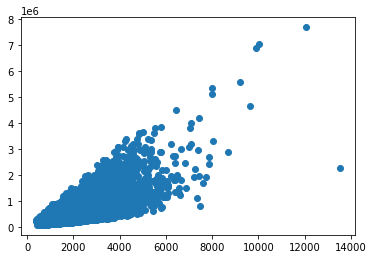

In [27]:
plt.scatter(x=new_df.sqft_living, y=new_df.price)

In [28]:
baseline_model = sm.formula.ols(formula='price ~ sqft_living', data=eda_df).fit()

baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:00:03   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.574e+04   4958.793     -9.225      0.000   -5.55e+04    -3.6e+04
sqft_living   282.1408      2.184    129.165      0.000     277.859     286.422
==============================================================================
Omnibus:                    12090.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474100.489
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      28.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:

y_train_preds = baseline_model.predict(new_df)
y_test_preds = baseline_model.predict(X_test)
baseline_train_rmse = rmse(y_train_preds, y_train)
baseline_test_rmse = rmse(y_test_preds, y_test)

print('Baseline rmse on training data: ', baseline_train_rmse)
print('Baseline rmse on testing data:  ', baseline_test_rmse)

Baseline rmse on training data:  262903.341514918
Baseline rmse on testing data:   256623.15488963886


### Highest Correlated with Prices

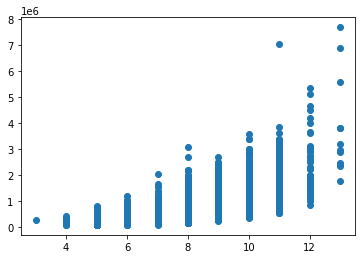

In [30]:
plt.scatter(x=new_df.grade, y=new_df.price)

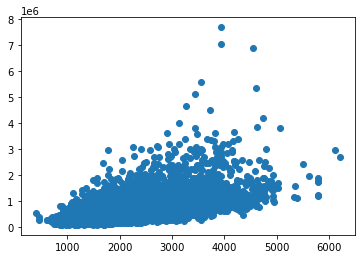

In [31]:
plt.scatter(x=new_df.sqft_living15, y=new_df.price)

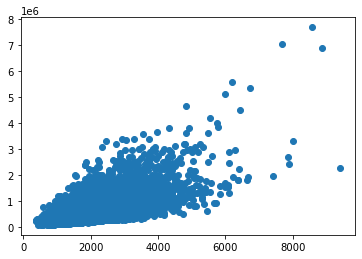

In [32]:
plt.scatter(x=new_df.sqft_above, y=new_df.price)

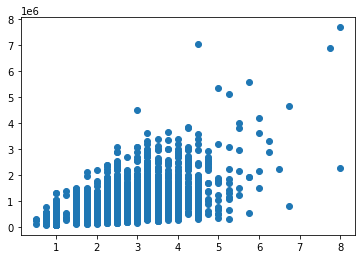

In [33]:
plt.scatter(x=new_df.bathrooms, y=new_df.price)

# Check for normality

In [34]:
def model_diagnostic(model):
    
    res = model.resid
    sm.graphics.qqplot(res, dist=stats.norm, line='45', fit=True)    
    plt.show;

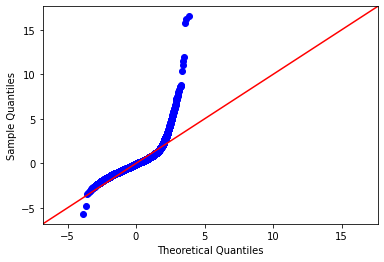

In [35]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=new_df).fit()
model_diagnostic(sqft_living_model)

In [36]:
new_df['price'] = np.log(new_df['price'])
new_df['sqft_living'] = np.log(new_df['sqft_living'])

C:\Users\ronak\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


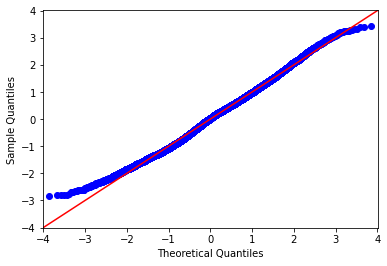

In [37]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=new_df).fit()
model_diagnostic(sqft_living_model)

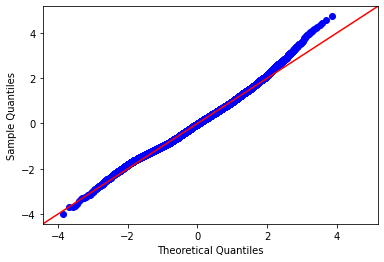

In [38]:
f = 'price~sqft_living15'
sqft_living_model = smf.ols(formula=f, data=new_df).fit()
model_diagnostic(sqft_living_model)

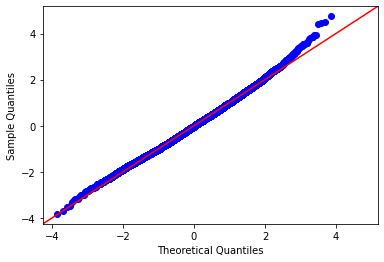

In [39]:
f = 'price~grade'
sqft_living_model = smf.ols(formula=f, data=new_df).fit()
model_diagnostic(sqft_living_model)

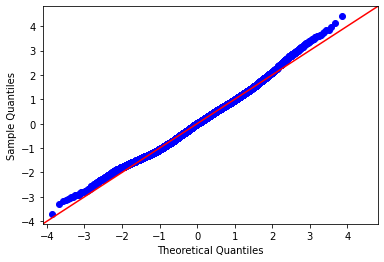

In [40]:
f = 'price~bathrooms'
sqft_living_model = smf.ols(formula=f, data=new_df).fit()
model_diagnostic(sqft_living_model)

# Multiple Regression

The variables that had the highest correlations with price 

In [41]:
m1 = smf.ols(formula="price ~ grade + bathrooms + sqft_living15  + sqft_living", data=new_df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5267.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:00:05   Log-Likelihood:                -6519.0
No. Observations:               17277   AIC:                         1.305e+04
Df Residuals:                   17272   BIC:                         1.309e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7733      0.077    114.004      0.000       8.622       8.924
grade             0.1838      0.004     48.416      0.000       0.176       0.191
bathrooms        -0.0085      0.006     -1.522      0.128      -0.019       0.002
sqft_living15  9.419e-05   6.26e-06     15.037      0.000    8.19e-05       0.000
sqft_living       0.3575      0.012     28.989      0.000       0.333       0.382
==============================================================================
Omnibus:                       86.750   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.201
Skew:                           0.137   Prob(JB):                     2.33e-18
Kurtosis:                       2.806   Cond. No.                     6.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
m2 = smf.ols(formula="price ~ grade + bathrooms + sqft_living", data=new_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6858.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:00:05   Log-Likelihood:                -6631.4
No. Observations:               17277   AIC:                         1.327e+04
Df Residuals:                   17273   BIC:                         1.330e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2297      0.068    120.355      0.000       8.096       8.364
grade           0.2049      0.004     57.739      0.000       0.198       0.212
bathrooms      -0.0139      0.006     -2.483      0.013      -0.025      -0.003
sqft_living     0.4344      0.011     38.458      0.000       0.412       0.457
==============================================================================
Omnibus:                       87.524   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.388
Skew:                           0.171   Prob(JB):                     6.41e-20
Kurtosis:                       2.921   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
m3 = smf.ols(formula="price ~ grade + bathrooms + sqft_living15", data=new_df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     6430.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:00:05   Log-Likelihood:                -6929.4
No. Observations:               17277   AIC:                         1.387e+04
Df Residuals:                   17273   BIC:                         1.390e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.9305      0.020    544.238      0.000      10.891      10.970
grade             0.2120      0.004     56.405      0.000       0.205       0.219
bathrooms         0.0751      0.005     15.301      0.000       0.065       0.085
sqft_living15     0.0002   5.84e-06     29.036      0.000       0.000       0.000
==============================================================================
Omnibus:                       81.076   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.921
Skew:                           0.152   Prob(JB):                     4.42e-18
Kurtosis:                       2.864   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing Model 1

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_df, new_df.price)
tn, tt = train_test_split(new_df,test_size=.25,shuffle=True)

In [45]:
tn_df = pd.DataFrame(X_train, y_train)
tt_df = pd.DataFrame(X_test, y_test)

In [46]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [47]:
y_tn = m1.predict(X_train)
y_tt = m1.predict(X_test)

In [48]:
train_mse = np.mean(y_train - y_tn)** 2
test_mse = np.mean(y_test - y_tt)** 2

tn_r2 = r2_score(tn['price'], m1.predict(tn))
tt_r2 = r2_score(tt['price'], m1.predict(tt))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print('R-Squared Train: ', tn_r2)
print('R-Squared Test: ', tt_r2)

Mean Squared Error Train: 2.0705292624206674e-09
Mean Squared Error Test: 1.8626141971981837e-08
R-Squared Train:  0.5465596312737175
R-Squared Test:  0.5577923560146321


# Testing Model 2

In [49]:
X_train, X_test, y_train, y_test = train_test_split(new_df, new_df.price)
tn, tt = train_test_split(new_df,test_size=.25,shuffle=True)

In [50]:
tn_df = pd.DataFrame(X_train, y_train)
tt_df = pd.DataFrame(X_test, y_test)

In [51]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [52]:
y_tn = m2.predict(X_train)
y_tt = m2.predict(X_test)

In [53]:
train_mse = np.mean(y_train - y_tn)**2
test_mse = np.mean(y_test-y_tt)**2

tn_r2 = r2_score(tn['price'], m2.predict(tn))
tt_r2 = r2_score(tt['price'], m2.predict(tt))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print('R-Squared Train: ', tn_r2)
print('R-Squared Test: ', tt_r2)

Mean Squared Error Train: 8.563794848520931e-08
Mean Squared Error Test: 7.703847529151968e-07
R-Squared Train:  0.544530229685283
R-Squared Test:  0.5406695854738615


# Testing Model 3

In [54]:
X_train, X_test, y_train, y_test = train_test_split(new_df, new_df.price)
tn, tt = train_test_split(new_df,test_size=.25,shuffle=True)

In [55]:
tn_df = pd.DataFrame(X_train, y_train)
tt_df = pd.DataFrame(X_test, y_test)

In [56]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [57]:
y_tn = m1.predict(X_train)
y_tt = m1.predict(X_test)

In [58]:
train_mse = np.mean(y_train - y_tn)**2
test_mse = np.mean(y_test-y_tt)**2

tn_r2 = r2_score(tn['price'], m3.predict(tn))
tt_r2 = r2_score(tt['price'], m3.predict(tt))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print('R-Squared Train: ', tn_r2)
print('R-Squared Test: ', tt_r2)

Mean Squared Error Train: 3.638277291657964e-07
Mean Squared Error Test: 3.2729337252248935e-06
R-Squared Train:  0.5269829046932551
R-Squared Test:  0.5292202396897461
